Regression results:                             OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     236.5
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           1.71e-82
Time:                        21:42:24   Log-Likelihood:                -668.50
No. Observations:                 144   AIC:                             1363.
Df Residuals:                     131   BIC:                             1402.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.6998      4.083

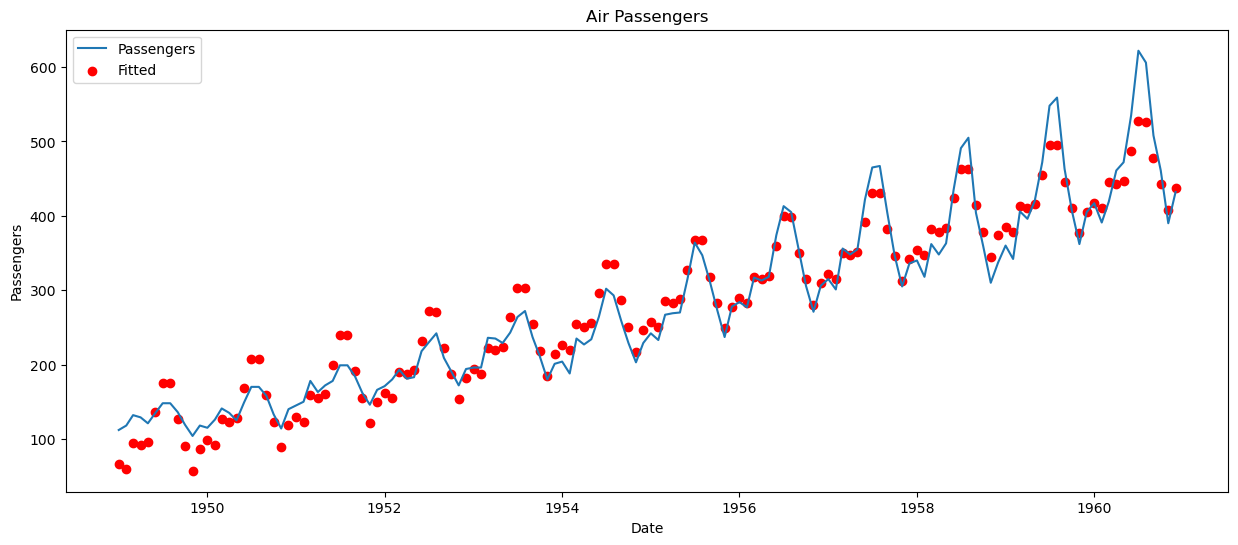

      T      Fitted
0   145  449.255682
1   146  442.505682
2   147  477.672348
3   148  474.589015
4   149  479.339015
5   150  519.172348
6   151  558.839015
7   152  558.589015
8   153  509.922348
9   154  474.089015
10  155  440.339015
11  156  469.339015


C:\Users\DMS-3573\AppData\Local\Temp\ipykernel_11612\1960133312.py:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], df_future['Fitted'], label='Predicted')


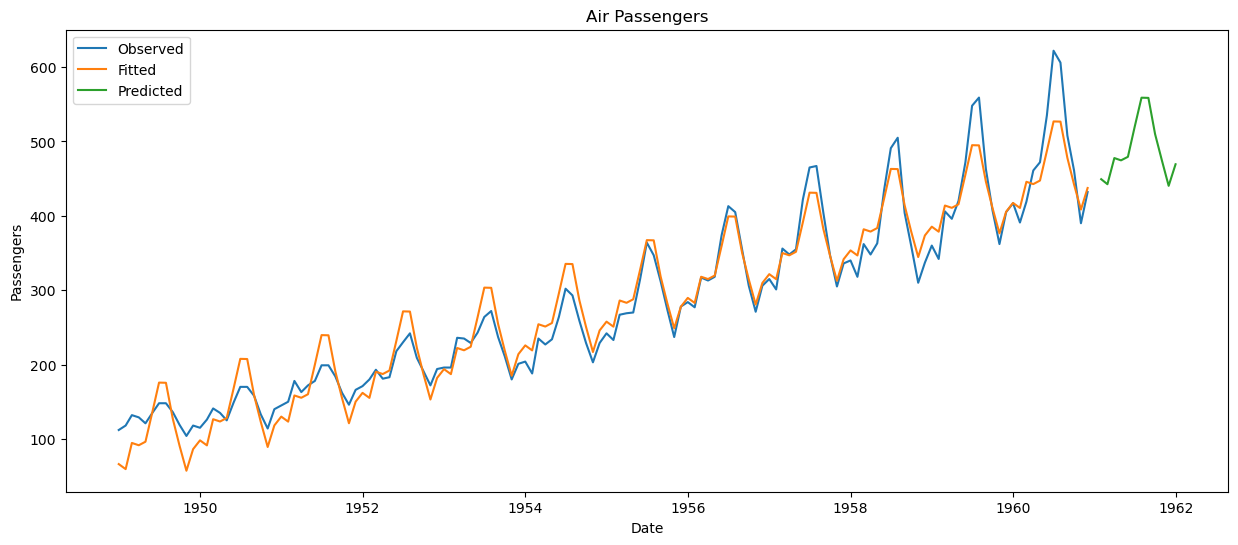

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

Dir = r'C:\Users\DMS-3573\Documents\GitHub\AAE625_25'
df = pd.read_csv(Dir + '/AirPassengers.csv')

df.columns = ['Date', 'Passengers']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['T'] = np.arange(len(df)) + 1

df['m1'] = np.where(df.index.month == 1, 1, 0)
df['m2'] = np.where(df.index.month == 2, 1, 0)
df['m3'] = np.where(df.index.month == 3, 1, 0)
df['m4'] = np.where(df.index.month == 4, 1, 0)
df['m5'] = np.where(df.index.month == 5, 1, 0)
df['m6'] = np.where(df.index.month == 6, 1, 0)
df['m7'] = np.where(df.index.month == 7, 1, 0)
df['m8'] = np.where(df.index.month == 8, 1, 0)
df['m9'] = np.where(df.index.month == 9, 1, 0)
df['m10'] = np.where(df.index.month == 10, 1, 0)
df['m11'] = np.where(df.index.month == 11, 1, 0)
df['m12'] = np.where(df.index.month == 12, 1, 0)

X = df[['T', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']]
X = sm.add_constant(X)
y = df['Passengers']

model = sm.OLS(y, X)
results = model.fit()
print('Regression results:', results.summary())

df['Fitted'] = results.fittedvalues

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Passengers'], label='Passengers')
plt.scatter(df.index, df['Fitted'], label='Fitted', color='red')
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

T = np.arange(len(df) + 1, len(df) + 13)
df_future = pd.DataFrame({'T': T})

df_future['m1'] = np.where(T % 12 == 1, 1, 0)
df_future['m2'] = np.where(T % 12 == 2, 1, 0)
df_future['m3'] = np.where(T % 12 == 3, 1, 0)
df_future['m4'] = np.where(T % 12 == 4, 1, 0)
df_future['m5'] = np.where(T % 12 == 5, 1, 0)
df_future['m6'] = np.where(T % 12 == 6, 1, 0)
df_future['m7'] = np.where(T % 12 == 7, 1, 0)
df_future['m8'] = np.where(T % 12 == 8, 1, 0)
df_future['m9'] = np.where(T % 12 == 9, 1, 0)
df_future['m10'] = np.where(T % 12 == 10, 1, 0)
df_future['m11'] = np.where(T % 12 == 11, 1, 0)
df_future['m12'] = np.where(T % 12 == 0, 1, 0)

df_future = sm.add_constant(df_future)

df_future['Fitted'] = results.predict(df_future)

print(df_future[['T', 'Fitted']])

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Passengers'], label='Observed')
plt.plot(df.index, df['Fitted'], label='Fitted')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], df_future['Fitted'], label='Predicted')
plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend(loc='upper left')
plt.show()

In [2]:
df_combined = pd.concat([df[['Passengers', 'Fitted']], df_future[['Fitted']].rename(columns={'Fitted': 'Passengers'})])
df_combined.to_csv(Dir + '/AirPassengers_with_forecast.csv')
